In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Instalar pacotes necessários
!pip install netCDF4 xarray cartopy matplotlib metpy


# Importar bibliotecas
import os
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import pandas as pd
from metpy.calc import wind_speed
from metpy.units import units

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.3/424.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 36.7 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


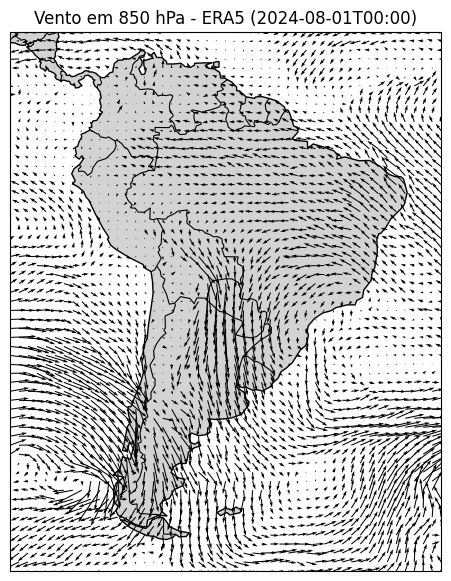

In [ ]:
# Caminho do arquivo NetCDF no Drive
file_path = "/content/drive/MyDrive/Meteorologia USP/TCC/DadosERA5/pressurelevels.nc"

# Abre o arquivo NetCDF
ds = xr.open_dataset(file_path)

# Escolhe um nível de pressão (ex: 850 hPa) e um instante de tempo
pressure_level = 850
time_index = 0  # Primeiro tempo disponível
ds = ds.sel(pressure_level=pressure_level, valid_time=ds.valid_time[time_index])

# Variáveis do vento
u = ds["u"].values  # Componente zonal
v = ds["v"].values  # Componente meridional
lons, lats = np.meshgrid(ds.longitude, ds.latitude)

# Configuração do mapa
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-90, -30, -60, 15], crs=ccrs.PlateCarree())  # América do Sul

# Adiciona feições geográficas
ax.add_feature(cfeature.BORDERS, linewidth=0.8)
ax.add_feature(cfeature.COASTLINE, linewidth=1.0)
ax.add_feature(cfeature.LAND, facecolor="lightgray")

# Plota o campo vetorial do vento
skip = 5  # Define espaçamento das setas para não poluir o mapa
ax.quiver(lons[::skip, ::skip], lats[::skip, ::skip],
          u[::skip, ::skip], v[::skip, ::skip],
          scale=400, transform=ccrs.PlateCarree())

# Título do mapa com data do arquivo
plt.title(f"Vento em {pressure_level} hPa - ERA5 ({str(ds.valid_time.values)[:16]})", fontsize=12)

# Mostra o mapa
plt.show()



In [ ]:
print(ds)

<xarray.Dataset> Size: 5MB
Dimensions:         (latitude: 301, longitude: 241)
Coordinates:
    number          int64 8B ...
    valid_time      datetime64[ns] 8B 2024-08-01
    pressure_level  float64 8B 850.0
  * latitude        (latitude) float64 2kB 15.0 14.75 14.5 ... -59.75 -60.0
  * longitude       (longitude) float64 2kB -90.0 -89.75 -89.5 ... -30.25 -30.0
    expver          <U4 16B ...
Data variables: (12/16)
    d               (latitude, longitude) float32 290kB ...
    cc              (latitude, longitude) float32 290kB ...
    z               (latitude, longitude) float32 290kB ...
    o3              (latitude, longitude) float32 290kB ...
    pv              (latitude, longitude) float32 290kB ...
    r               (latitude, longitude) float32 290kB ...
    ...              ...
    cswc            (latitude, longitude) float32 290kB ...
    t               (latitude, longitude) float32 290kB ...
    u               (latitude, longitude) float32 290kB -2.17 -1.558 ...

In [ ]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from metpy.units import units
from metpy.calc import wind_speed

# Caminho do arquivo NetCDF
file_path = "/content/drive/MyDrive/Meteorologia USP/TCC/DadosERA5/pressurelevels.nc"

# Abrir o arquivo NetCDF
ds = xr.open_dataset(file_path)

# Selecionar nível de pressão e intervalo de datas
pressure_level = 1000  # hPa
start_date = "2024-08-20"
end_date = "2024-09-10"
target_hour = "18:00"

# Coordenadas das estações e cores das estrelas
estacoes = {
    'São_Paulo': {'coords': (-23.5505, -46.6333), 'cor': 'white'},
    'Cuiaba-Miranda': {'coords': (-15.73091, -56.07086), 'cor': 'darkred'},
    'Alta-Floresta': {'coords': (-9.908354, -56.064393), 'cor': 'darkgreen'}
}

# Criar mapa para cada dia no intervalo
for date in pd.date_range(start_date, end_date, freq="D"):
    try:
        # Selecionar o horário específico (18:00 UTC)
        ds_day = ds.sel(pressure_level=pressure_level, valid_time=pd.to_datetime(f"{date} {target_hour}"))

        #  Variáveis do vento
        u = ds_day["u"].values * units("m/s")  # Componente zonal
        v = ds_day["v"].values * units("m/s")  # Componente meridional
        wind_mag = wind_speed(u, v)  # Magnitude do vento
        lons, lats = np.meshgrid(ds_day.longitude, ds_day.latitude)

        # Configuração do mapa
        fig, ax = plt.subplots(figsize=(10, 7), subplot_kw={'projection': ccrs.PlateCarree()})
        ax.set_extent([-90, -30, -60, 15], crs=ccrs.PlateCarree())  # América do Sul

        # Adicionar feições geográficas
        ax.add_feature(cfeature.BORDERS, linewidth=0.8)
        ax.add_feature(cfeature.COASTLINE, linewidth=1.0)
        ax.add_feature(cfeature.LAND)
        ax.add_feature(cfeature.OCEAN)

        # Sombreamento da magnitude do vento
        cmap = plt.cm.viridis
        cf = ax.contourf(lons, lats, wind_mag, levels=20, cmap=cmap, alpha=0.7, transform=ccrs.PlateCarree())

        # Linhas de corrente do vento
        ax.streamplot(lons, lats, u.m, v.m, color='black', linewidth=0.5, density=2, transform=ccrs.PlateCarree())

        # Estações meteorológicas
        for nome, info in estacoes.items():
            lat, lon = info['coords']
            cor = info['cor']
            ax.plot(lon, lat, marker='*', color=cor, markersize=15,
                    markeredgecolor='black', markeredgewidth=1.5,
                    transform=ccrs.PlateCarree())
            ax.text(lon + 1, lat + 1, nome.replace('-', ' '), color='black',
                    fontsize=10, transform=ccrs.PlateCarree())

        # Título do mapa
        plt.title(f"Vento em 1000 hPa - ERA5 ({date.strftime('%d/%m/%Y')} 18UTC)", fontsize=12)

        # Barra de cores vertical ao lado
        cbar = fig.colorbar(cf, ax=ax, orientation="vertical", shrink=0.7, pad=0.02)
        cbar.set_label("Velocidade do Vento (m/s)")

        # Salvar figura com fundo transparente
        plt.savefig(
            f"/content/drive/MyDrive/Meteorologia USP/TCC/mapasvento_imagens/vento_1000hPa_{date.strftime('%Y%m%d')}_18UTC.png",
            dpi=300, bbox_inches="tight", transparent=True, pad_inches=0
        )
        plt.close()

    except Exception as e:
        print(f"Erro ao processar {date}: {e}")





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
from metpy.units import units
from metpy.calc import wind_speed
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#Caminho do arquivo NetCDF
file_path = "/content/drive/MyDrive/Meteorologia USP/TCC/DadosERA5/pressurelevels.nc"

#Abrir o arquivo NetCDF
ds = xr.open_dataset(file_path)

# Selecionar nível de pressão e intervalo de datas
pressure_level = 1000  # hPa
start_date = "2024-08-20"
end_date = "2024-09-10"
target_hour = "18:00"

# Coordenadas das estações e cores das estrelas
estacoes = {
    'São_Paulo': {'coords': (-23.5505, -46.6333), 'cor': 'white'},
    'Cuiaba-Miranda': {'coords': (-15.73091, -56.07086), 'cor': 'darkred'},
    'Alta-Floresta': {'coords': (-9.908354, -56.064393), 'cor': 'darkgreen'}
}

# Criar mapa para cada dia no intervalo
for date in pd.date_range(start_date, end_date, freq="D"):
    try:
        # Selecionar o horário específico (18:00 UTC)
        ds_day = ds.sel(pressure_level=pressure_level, valid_time=pd.to_datetime(f"{date} {target_hour}"))

        # Variáveis do vento
        u = ds_day["u"].values * units("m/s")  # Componente zonal
        v = ds_day["v"].values * units("m/s")  # Componente meridional
        wind_mag = wind_speed(u, v)  # Magnitude do vento
        lons, lats = np.meshgrid(ds_day.longitude, ds_day.latitude)

        # Configuração do mapa
        fig, ax = plt.subplots(figsize=(10, 7), subplot_kw={'projection': ccrs.PlateCarree()})
        ax.set_extent([-90, -30, -60, 15], crs=ccrs.PlateCarree())  # América do Sul

        # Adicionar feições geográficas
        ax.add_feature(cfeature.BORDERS, linewidth=0.8)
        ax.add_feature(cfeature.COASTLINE, linewidth=1.0)
        ax.add_feature(cfeature.LAND)
        ax.add_feature(cfeature.OCEAN)

        # Sombreamento da magnitude do vento
        cmap = plt.cm.Blues
        cf = ax.contourf(lons, lats, wind_mag, levels=20, cmap=cmap, alpha=0.7, transform=ccrs.PlateCarree())

        # Linhas de corrente do vento
        # Máscara para vento > 8 m/s (preto)
        mask_low = wind_mag.magnitude
        u_low = np.where(mask_low, u.m, np.nan)
        v_low = np.where(mask_low, v.m, np.nan)
        ax.streamplot(lons, lats, u_low, v_low, color='black', linewidth=0.5, density=2, transform=ccrs.PlateCarree(), zorder=2)

        # Estações meteorológicas
        for nome, info in estacoes.items():
            lat, lon = info['coords']
            cor = info['cor']
            ax.plot(lon, lat, marker='*', color=cor, markersize=15,
                    markeredgecolor='black', markeredgewidth=1.5,
                    transform=ccrs.PlateCarree())
            ax.text(lon + 1, lat + 1, nome.replace('-', ' '), color='black',
                    fontsize=10, transform=ccrs.PlateCarree())

        # Título do mapa
        plt.title(f"Vento em 1000 hPa - ERA5 ({date.strftime('%d/%m/%Y')} 18UTC)", fontsize=12)

        # Barra de cores vertical ao lado
        cbar = fig.colorbar(cf, ax=ax, orientation="vertical", shrink=0.7, pad=0.02)
        cbar.set_label("Velocidade do Vento (m/s)")

        # Salvar figura com fundo transparente e exibir mensagem
        print(f"[Salvando] Salvando imagem para {date.strftime('%Y%m%d')}_18UTC")
        plt.savefig(
            f"/content/drive/MyDrive/Meteorologia USP/TCC/mapasvento_imagens/vento_1000hPa_Cor_{date.strftime('%Y%m%d')}_18UTC.png",
            dpi=300, bbox_inches="tight", transparent=True, pad_inches=0
        )
        plt.close()

    except Exception as e:
        print(f"Erro ao processar {date}: {e}")

[Salvando] Salvando imagem para 20240820_18UTC
[Salvando] Salvando imagem para 20240821_18UTC
[Salvando] Salvando imagem para 20240822_18UTC
[Salvando] Salvando imagem para 20240823_18UTC
[Salvando] Salvando imagem para 20240824_18UTC
[Salvando] Salvando imagem para 20240825_18UTC
[Salvando] Salvando imagem para 20240826_18UTC
[Salvando] Salvando imagem para 20240827_18UTC
[Salvando] Salvando imagem para 20240828_18UTC
[Salvando] Salvando imagem para 20240829_18UTC
[Salvando] Salvando imagem para 20240830_18UTC
[Salvando] Salvando imagem para 20240831_18UTC
[Salvando] Salvando imagem para 20240901_18UTC
[Salvando] Salvando imagem para 20240902_18UTC
[Salvando] Salvando imagem para 20240903_18UTC
[Salvando] Salvando imagem para 20240904_18UTC
[Salvando] Salvando imagem para 20240905_18UTC
[Salvando] Salvando imagem para 20240906_18UTC
[Salvando] Salvando imagem para 20240907_18UTC
[Salvando] Salvando imagem para 20240908_18UTC
[Salvando] Salvando imagem para 20240909_18UTC
[Salvando] Sa